In [32]:
#Hierarchical Clustering Classification
#https://www.datasciencelearner.com/how-to-do-hierarchical-clustering-in-python/
import pandas as pd
import numpy as np

import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score 
import sklearn.metrics as sm
from sklearn.preprocessing import scale
import scipy.cluster.hierarchy as shc 

In [33]:
dataset = pd.read_csv("data_test_two.csv")

In [34]:
dataset.shape

(1000, 31)

In [35]:
dataset.head()

,Filename,Chromagram,RootMeanSquare,LowEnergyBrightness,SpectralCentroid,Flatness,Bandwidth,InHarmonicity,Rolloff,ZeroCrossingRate,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.308240,0.082484,27.461745,1530.180434,0.001002,1824.429264,0.001347,3168.064176,0.070382,...,6.820536,0.147667,4.328625,-1.665351,-1.945349,0.523056,-2.841816,-0.065698,-0.999933,blues
1,blues.00001.wav,0.301362,0.064603,27.914919,1175.096777,0.000376,1712.769659,0.018918,2418.127045,0.044440,...,2.653106,0.852110,2.218112,-4.896205,-1.090712,1.080965,-0.705705,1.682992,-0.814985,blues
2,blues.00002.wav,0.296246,0.121445,28.715256,1300.687993,0.000450,1573.146791,0.023695,2474.635036,0.064787,...,4.730809,-7.923660,-5.274928,-8.546422,0.367640,-7.297458,-4.841222,-3.672829,-4.288005,blues
3,blues.00003.wav,0.378577,0.117733,27.093797,763.311989,0.000145,1282.633866,0.003308,1384.558294,0.024863,...,5.116895,0.443054,-1.879724,0.222495,1.200053,-0.744148,1.804096,-0.031980,-4.040267,blues
4,blues.00004.wav,0.261497,0.060894,28.869262,1537.410063,0.000794,1578.964166,-0.049976,2951.473820,0.085609,...,-6.884247,-6.812018,-12.432060,-10.807361,-8.185105,-5.412588,-1.941454,-7.050840,-17.652891,blues


In [37]:
X = dataset.drop(['Filename','label'],axis=1) #Filename is not required
X

,Chromagram,RootMeanSquare,LowEnergyBrightness,SpectralCentroid,Flatness,Bandwidth,InHarmonicity,Rolloff,ZeroCrossingRate,mfcc1,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0.308240,0.082484,27.461745,1530.180434,0.001002,1824.429264,0.001347,3168.064176,0.070382,-188.432709,...,-3.841403,6.820536,0.147667,4.328625,-1.665351,-1.945349,0.523056,-2.841816,-0.065698,-0.999933
1,0.301362,0.064603,27.914919,1175.096777,0.000376,1712.769659,0.018918,2418.127045,0.044440,-286.279358,...,-0.362909,2.653106,0.852110,2.218112,-4.896205,-1.090712,1.080965,-0.705705,1.682992,-0.814985
2,0.296246,0.121445,28.715256,1300.687993,0.000450,1573.146791,0.023695,2474.635036,0.064787,-166.067474,...,-11.016151,4.730809,-7.923660,-5.274928,-8.546422,0.367640,-7.297458,-4.841222,-3.672829,-4.288005
3,0.378577,0.117733,27.093797,763.311989,0.000145,1282.633866,0.003308,1384.558294,0.024863,-274.509918,...,2.314332,5.116895,0.443054,-1.879724,0.222495,1.200053,-0.744148,1.804096,-0.031980,-4.040267
4,0.261497,0.060894,28.869262,1537.410063,0.000794,1578.964166,-0.049976,2951.473820,0.085609,-236.730896,...,-12.304211,-6.884247,-6.812018,-12.432060,-10.807361,-8.185105,-5.412588,-1.941454,-7.050840,-17.652891
5,0.265523,0.078779,30.561682,1513.328291,0.000586,1545.490618,0.015439,2875.332613,0.073996,-245.983459,...,-11.456192,-5.041521,-12.399594,-13.481972,-5.546961,-7.549344,-2.157791,-4.669054,-5.308126,-11.258170
6,0.254311,0.109664,30.890941,1145.755065,0.000196,1214.084741,-0.028623,2288.361163,0.056807,-265.051422,...,-7.241819,-4.880396,-8.586984,-13.354753,-10.079572,-14.145937,-14.757613,-9.688439,-4.972361,-8.607906
7,0.269021,0.099818,29.627338,1154.687121,0.000298,1396.025197,-0.025248,2349.544126,0.047211,-249.687042,...,-7.557844,-10.341427,-3.978712,-9.801023,-11.270885,-12.219318,-14.790883,-14.485509,-8.179283,-12.457853
8,0.372944,0.109156,28.785792,1332.261464,0.000292,1809.549485,0.019990,2866.499333,0.047101,-194.822754,...,-2.568450,5.496655,-11.706227,3.229072,-2.763687,-6.007565,-5.540375,2.960684,7.256684,-3.030926
9,0.238587,0.063637,27.988616,1508.097045,0.000665,1828.410837,0.002759,3334.704835,0.061107,-278.294952,...,-2.611455,1.599311,1.685762,-8.053340,0.238462,-2.820112,-2.154358,-2.951769,1.633783,-4.941733


In [38]:
# Scaling the data so that all the features become comparable 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
  
# Normalizing the data so that the data approximately  
# follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 
X_normalized

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-0.162890,-0.106672,0.086605,-0.165262,-0.147788,-0.138993,-0.046184,-0.164003,-0.090801,0.124923,...,0.170436,0.067394,0.387694,0.133837,0.238701,-0.270745,0.440558,-0.297177,0.268596,0.015465
1,-0.124213,-0.167916,0.090630,-0.256985,-0.102890,-0.144110,0.332896,-0.238607,-0.265119,-0.206410,...,0.239300,-0.112839,0.261118,-0.012173,-0.013043,-0.122994,0.290880,-0.075668,0.256232,0.017882
2,-0.138354,0.156592,0.152829,-0.192888,-0.097081,-0.211511,0.413454,-0.218783,-0.095705,0.133284,...,-0.174265,-0.035024,-0.100984,-0.325640,-0.181309,-0.054456,-0.118259,-0.261977,-0.035390,-0.138501
3,0.128109,0.102284,0.014594,-0.318219,-0.078230,-0.273991,0.009123,-0.312370,-0.306496,-0.124698,...,0.249308,-0.016122,0.176310,-0.138075,0.168798,-0.013686,0.144975,0.031867,0.117309,-0.095923
4,-0.133277,-0.090243,0.082132,-0.045497,-0.044363,-0.103449,-0.514529,-0.066007,0.033090,-0.030512,...,-0.110713,-0.220587,-0.028016,-0.310419,-0.141859,-0.212005,-0.014324,-0.064112,-0.105593,-0.365992
5,-0.168953,-0.054577,0.203153,-0.067971,-0.062680,-0.150649,0.167247,-0.097785,-0.015922,-0.057980,...,-0.127273,-0.252977,-0.186814,-0.446256,-0.028399,-0.266283,0.083650,-0.169362,-0.080827,-0.300541
6,-0.152157,0.046727,0.170898,-0.133431,-0.052912,-0.205893,-0.317440,-0.129911,-0.081330,-0.071855,...,-0.016053,-0.192511,-0.065682,-0.342008,-0.129867,-0.353757,-0.243083,-0.249194,-0.053363,-0.171016
7,-0.128856,0.019145,0.122167,-0.136863,-0.053858,-0.163189,-0.294861,-0.129346,-0.124788,-0.052104,...,-0.023135,-0.303623,0.030577,-0.276229,-0.164732,-0.323270,-0.253910,-0.377183,-0.145832,-0.270540
8,0.137275,0.080966,0.146111,-0.165228,-0.092671,-0.080604,0.313636,-0.136588,-0.215190,0.049761,...,0.134473,-0.007391,-0.232570,0.028258,0.079300,-0.306074,-0.032169,0.087763,0.496036,-0.075674
9,-0.351450,-0.165124,0.092250,-0.103343,-0.091498,-0.076971,0.001296,-0.063540,-0.123370,-0.174577,...,0.143162,-0.144208,0.281570,-0.438365,0.223045,-0.191773,0.124614,-0.173991,0.241244,-0.166400


In [39]:
z = linkage(X_normalized, method = 'ward')

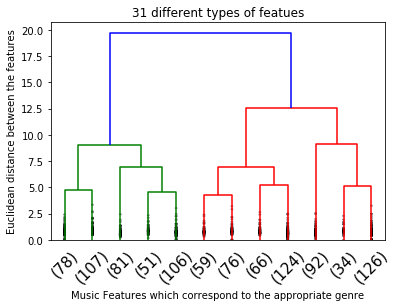

In [40]:
#http://www.semspirit.com/artificial-intelligence/machine-learning/clustering/hierarchical-clustering/hierarchical-clustering-in-python/
# dendrogram(z,truncate_mode= "lastp", p =12, leaf_rotation=45,leaf_font_size=15, show_contracted=True)
# plt.title("Truncated Hierachial Clustering Dendrogram")
# plt.xlabel("Cluster Size")
# plt.ylabel("Distance")
# #divide the cluster
# plt.axhline(y=15)
# plt.axhline(5)
# plt.axhline(10)
# plt.show()

import scipy.cluster.hierarchy as sch
den = sch.dendrogram(z, truncate_mode= "lastp", p =12, leaf_rotation=45,leaf_font_size=15, show_contracted=True)
#den = sch.dendrogram(z)
plt.title('31 different types of featues')
plt.xlabel('Music Features which correspond to the appropriate genre')
plt.ylabel('Euclidean distance between the features');
plt.show()

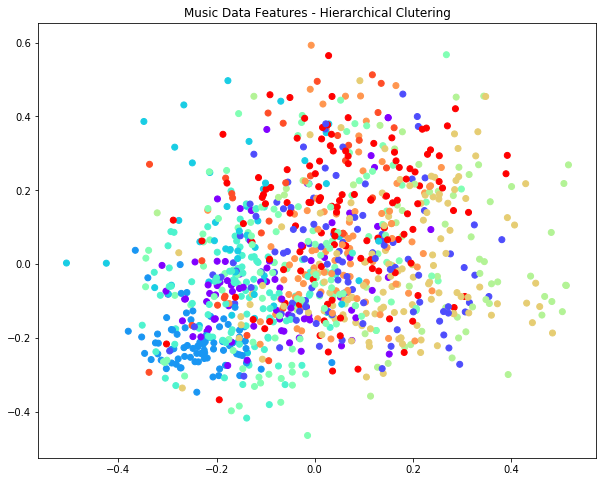

In [9]:
# Assigning the clusters and plotting the observations as per hierarchical clustering
#https://medium.com/datadriveninvestor/unsupervised-learning-with-python-k-means-and-hierarchical-clustering-f36ceeec919c
from scipy.cluster.hierarchy import fcluster
k=11
cluster_2 = fcluster(z, k, criterion='maxclust')
cluster_2[0:30:,]
plt.figure(figsize=(10, 8))
plt.scatter(X_normalized.iloc[:,0], X_normalized.iloc[:,1],c=cluster_2, cmap='rainbow')  # plot points with cluster dependent colors
plt.title('Music Data Features - Hierarchical Clutering')
plt.show()

In [10]:
# New Dataframe called cluster
cluster_Hierarchical = pd.DataFrame(cluster_2)
# Adding the hierarchical clustering to dataset
dataset=dataset
dataset['cluster'] = cluster_Hierarchical
dataset

,Filename,Chromagram,RootMeanSquare,LowEnergyBrightness,SpectralCentroid,Flatness,Bandwidth,InHarmonicity,Rolloff,ZeroCrossingRate,...,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label,cluster
0,blues.00000.wav,0.308240,0.082484,27.461745,1530.180434,0.001002,1824.429264,0.001347,3168.064176,0.070382,...,0.147667,4.328625,-1.665351,-1.945349,0.523056,-2.841816,-0.065698,-0.999933,blues,2
1,blues.00001.wav,0.301362,0.064603,27.914919,1175.096777,0.000376,1712.769659,0.018918,2418.127045,0.044440,...,0.852110,2.218112,-4.896205,-1.090712,1.080965,-0.705705,1.682992,-0.814985,blues,1
2,blues.00002.wav,0.296246,0.121445,28.715256,1300.687993,0.000450,1573.146791,0.023695,2474.635036,0.064787,...,-7.923660,-5.274928,-8.546422,0.367640,-7.297458,-4.841222,-3.672829,-4.288005,blues,4
3,blues.00003.wav,0.378577,0.117733,27.093797,763.311989,0.000145,1282.633866,0.003308,1384.558294,0.024863,...,0.443054,-1.879724,0.222495,1.200053,-0.744148,1.804096,-0.031980,-4.040267,blues,1
4,blues.00004.wav,0.261497,0.060894,28.869262,1537.410063,0.000794,1578.964166,-0.049976,2951.473820,0.085609,...,-6.812018,-12.432060,-10.807361,-8.185105,-5.412588,-1.941454,-7.050840,-17.652891,blues,5
5,blues.00005.wav,0.265523,0.078779,30.561682,1513.328291,0.000586,1545.490618,0.015439,2875.332613,0.073996,...,-12.399594,-13.481972,-5.546961,-7.549344,-2.157791,-4.669054,-5.308126,-11.258170,blues,5
6,blues.00006.wav,0.254311,0.109664,30.890941,1145.755065,0.000196,1214.084741,-0.028623,2288.361163,0.056807,...,-8.586984,-13.354753,-10.079572,-14.145937,-14.757613,-9.688439,-4.972361,-8.607906,blues,5
7,blues.00007.wav,0.269021,0.099818,29.627338,1154.687121,0.000298,1396.025197,-0.025248,2349.544126,0.047211,...,-3.978712,-9.801023,-11.270885,-12.219318,-14.790883,-14.485509,-8.179283,-12.457853,blues,5
8,blues.00008.wav,0.372944,0.109156,28.785792,1332.261464,0.000292,1809.549485,0.019990,2866.499333,0.047101,...,-11.706227,3.229072,-2.763687,-6.007565,-5.540375,2.960684,7.256684,-3.030926,blues,2
9,blues.00009.wav,0.238587,0.063637,27.988616,1508.097045,0.000665,1828.410837,0.002759,3334.704835,0.061107,...,1.685762,-8.053340,0.238462,-2.820112,-2.154358,-2.951769,1.633783,-4.941733,blues,5


In [11]:
X = dataset.drop(['Filename','label'],axis=1) #Filename is not required
Y = dataset['label']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10)

In [13]:
#https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [14]:
y_pred = svclassifier.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

[[ 5  0  0  0  0  1  0  0  0  2]
 [ 0 10  0  0  0  0  0  0  0  0]
 [ 2  0  6  1  1  0  0  0  0  0]
 [ 1  0  0  4  1  0  0  0  3  1]
 [ 1  0  2  0  6  0  0  2  0  0]
 [ 0  1  0  0  0  4  0  0  0  0]
 [ 2  0  0  0  4  0  7  0  0  1]
 [ 0  0  1  0  3  0  0 11  0  1]
 [ 0  0  0  2  0  0  0  0  5  0]
 [ 0  0  0  3  0  1  0  1  0  4]]
              precision    recall  f1-score   support

       blues       0.45      0.62      0.53         8
   classical       0.91      1.00      0.95        10
     country       0.67      0.60      0.63        10
       disco       0.40      0.40      0.40        10
      hiphop       0.40      0.55      0.46        11
        jazz       0.67      0.80      0.73         5
       metal       1.00      0.50      0.67        14
         pop       0.79      0.69      0.73        16
      reggae       0.62      0.71      0.67         7
        rock       0.44      0.44      0.44         9

    accuracy                           0.62       100
   macro avg       

In [17]:
C = confusion_matrix(Y_test,y_pred) + np.transpose(confusion_matrix(Y_test,y_pred))

In [18]:
print(C)

[[10  0  2  1  1  1  2  0  0  2]
 [ 0 20  0  0  0  1  0  0  0  0]
 [ 2  0 12  1  3  0  0  1  0  0]
 [ 1  0  1  8  1  0  0  0  5  4]
 [ 1  0  3  1 12  0  4  5  0  0]
 [ 1  1  0  0  0  8  0  0  0  1]
 [ 2  0  0  0  4  0 14  0  0  1]
 [ 0  0  1  0  5  0  0 22  0  2]
 [ 0  0  0  5  0  0  0  0 10  0]
 [ 2  0  0  4  0  1  1  2  0  8]]


In [256]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 11, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_test)
#https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/
#print(hc.labels_)
y_hc

array([ 4,  2,  9,  7,  4,  7,  2,  0,  0,  1,  2,  4,  0,  9,  5,  7,  3,
        6,  2,  0,  1,  8,  0,  0,  0,  2,  3,  0,  5,  6,  6,  2,  6,  6,
        0,  5,  3,  3,  6,  3,  1,  1,  2,  0,  6,  7,  6,  6,  0,  7,  4,
        2,  4,  0,  7,  4,  1,  1,  3,  6,  6,  6,  6,  7,  3, 10,  1,  9,
        2,  6,  4,  0,  6,  7,  0, 10,  2,  5,  1,  4,  2,  0,  8,  0,  2,
        3,  5, 10,  1,  2,  3,  1,  5,  2,  6, 10,  6, 10,  7,  1],
      dtype=int64)

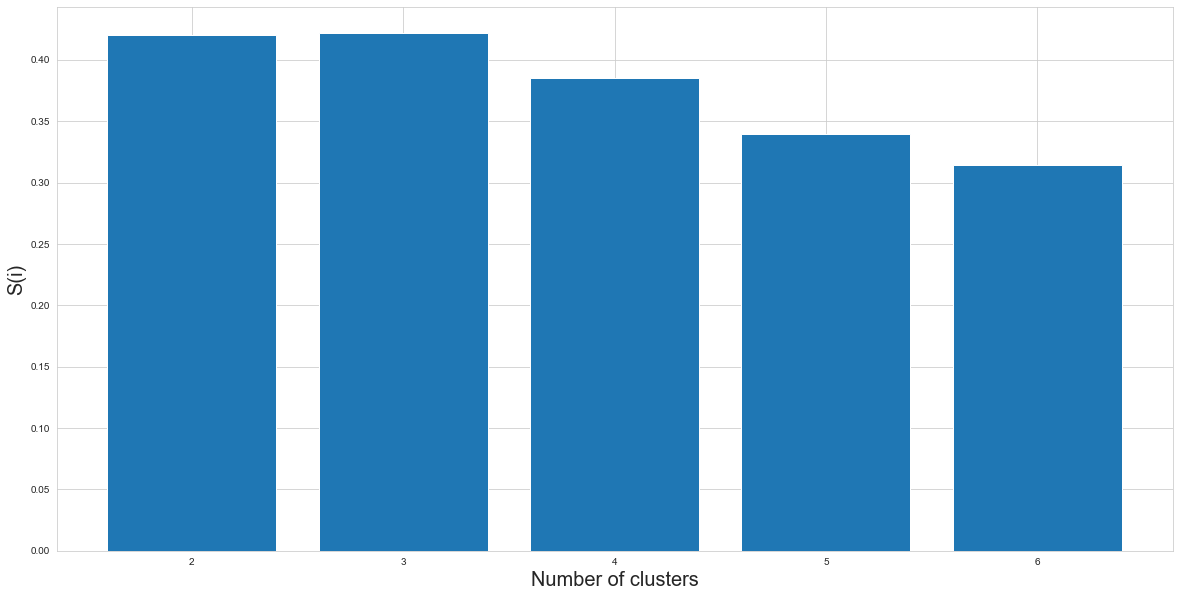

In [74]:
# k = [2, 3, 4, 5, 6] 
  
# # Appending the silhouette scores of the different models to the list 
# silhouette_scores = [] 
# silhouette_scores.append( 
#         silhouette_score(X_principal, ac2.fit_predict(X_principal))) 
# silhouette_scores.append( 
#         silhouette_score(X_principal, ac3.fit_predict(X_principal))) 
# silhouette_scores.append( 
#         silhouette_score(X_principal, ac4.fit_predict(X_principal))) 
# silhouette_scores.append( 
#         silhouette_score(X_principal, ac5.fit_predict(X_principal))) 
# silhouette_scores.append( 
#         silhouette_score(X_principal, ac6.fit_predict(X_principal))) 
  
# # Plotting a bar graph to compare the results 
# plt.bar(k, silhouette_scores) 
# plt.xlabel('Number of clusters', fontsize = 20) 
# plt.ylabel('S(i)', fontsize = 20) 
# plt.show() 